In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# checking files in dataset
! ls data/

15_9-19_A_CPI_LITHO.csv     DATA_Harvard_2012_10_31.csv
15_9-19_BT2_CPI_LITHO.csv   Merged_Data.csv


In [3]:
# loading Data Harvard 2012 10 31
df = pd.read_csv("data/DATA_Harvard_2012_10_31.csv")

In [4]:
# checking shape of the data
df.shape

(64943, 7)

In [5]:
# checking top 10 rows
df.head(10)

,DATE,FIELD,FORMATION,WELL_NAME,OIL,WATER,GAS
0,7/31/1987,EULER,Athena,EUAT-1,2552.684578,0.0,4.943497e+05
1,8/31/1987,EULER,Athena,EUAT-1,2553.499502,0.0,4.944996e+05
2,9/30/1987,EULER,Athena,EUAT-1,2476.746157,0.0,4.795948e+05
3,10/31/1987,EULER,Athena,EUAT-1,2528.396267,0.0,9.961855e+05
4,11/30/1987,EULER,Athena,EUAT-1,2471.896561,0.0,9.739247e+05
5,12/31/1987,EULER,Athena,EUAT-1,2526.294515,0.0,9.953574e+05
6,1/31/1988,EULER,Athena,EUAT-1,2556.063052,0.0,1.007086e+06
7,2/29/1988,EULER,Athena,EUAT-1,2504.383394,0.0,9.867245e+05
8,3/31/1988,EULER,Athena,EUAT-1,2403.902873,0.0,9.471352e+05
9,4/30/1988,EULER,Athena,EUAT-1,2557.307810,0.0,1.007577e+06


In [6]:
# checking data types
df.dtypes

DATE          object
FIELD         object
FORMATION     object
WELL_NAME     object
OIL          float64
WATER        float64
GAS          float64
dtype: object

In [7]:
# renaming
df = df.rename(columns={i:i.lower() for i in df.columns})
df.head(10)

,date,field,formation,well_name,oil,water,gas
0,7/31/1987,EULER,Athena,EUAT-1,2552.684578,0.0,4.943497e+05
1,8/31/1987,EULER,Athena,EUAT-1,2553.499502,0.0,4.944996e+05
2,9/30/1987,EULER,Athena,EUAT-1,2476.746157,0.0,4.795948e+05
3,10/31/1987,EULER,Athena,EUAT-1,2528.396267,0.0,9.961855e+05
4,11/30/1987,EULER,Athena,EUAT-1,2471.896561,0.0,9.739247e+05
5,12/31/1987,EULER,Athena,EUAT-1,2526.294515,0.0,9.953574e+05
6,1/31/1988,EULER,Athena,EUAT-1,2556.063052,0.0,1.007086e+06
7,2/29/1988,EULER,Athena,EUAT-1,2504.383394,0.0,9.867245e+05
8,3/31/1988,EULER,Athena,EUAT-1,2403.902873,0.0,9.471352e+05
9,4/30/1988,EULER,Athena,EUAT-1,2557.307810,0.0,1.007577e+06


In [8]:
# converting date to datetime
df["date"] = pd.to_datetime(df["date"],format="%m/%d/%Y")
df["date"]

0       1987-07-31
1       1987-08-31
2       1987-09-30
3       1987-10-31
4       1987-11-30
           ...    
64938   2012-07-31
64939   2012-08-31
64940   2012-09-30
64941   2012-10-31
64942   2012-10-31
Name: date, Length: 64943, dtype: datetime64[ns]

In [9]:
# counting field values
df["field"].value_counts()

BERNOULLI    35481
EULER        29462
Name: field, dtype: int64

In [10]:
# unique wells
df["well_name"].unique().shape

(497,)

In [11]:
# how many wells per field
df.groupby("field")["well_name"].apply(lambda x: x.unique().shape[0])

field
BERNOULLI    269
EULER        228
Name: well_name, dtype: int64

In [12]:
# formation per feild
df.groupby("field")["formation"].apply(lambda x: x.unique())

field
BERNOULLI    [Demeter, Zeus, Apollo]
EULER               [Athena, Apollo]
Name: formation, dtype: object

In [13]:
# how many formations
df["formation"].value_counts()

Apollo     24304
Athena     20025
Demeter    12509
Zeus        8105
Name: formation, dtype: int64

In [14]:
# how many wells per formation 
# this shows, no well intercepts 2 formations (203 + 125 + 69 + 100 = 497 == number of unique wells)
df.groupby("formation")["well_name"].apply(lambda x: x.unique().shape[0])

formation
Apollo     203
Athena     125
Demeter     69
Zeus       100
Name: well_name, dtype: int64

In [15]:
# check each well period
period = df.groupby("well_name")["date"].apply(lambda x: x.max() - x.min())
print(period.max())
print(period.min())
print(period.mean())
period

18720 days 00:00:00
0 days 00:00:00
3947 days 05:44:47.323943680


well_name
BEAP-1      4933 days
BEAP-10     4536 days
BEAP-109   14153 days
BEAP-11     4506 days
BEAP-110    5905 days
              ...    
EUAT-94      854 days
EUAT-96     1491 days
EUAT-97     1096 days
EUAT-98     1280 days
EUAT-99     1219 days
Name: date, Length: 497, dtype: timedelta64[ns]

In [16]:
# check period with 0 days
badWells = period[period<np.timedelta64(1, 'D')]
badWells

well_name
BEAP-133   0 days
BEAP-21    0 days
BEAP-77    0 days
BEAP-85    0 days
BEAP-90    0 days
BEZE-105   0 days
BEZE-106   0 days
BEZE-110   0 days
BEZE-121   0 days
EUAT-104   0 days
EUAT-135   0 days
Name: date, dtype: timedelta64[ns]

In [17]:
# what data we have regarding these wells?
df[df["well_name"].isin(badWells.index)]

,date,field,formation,well_name,oil,water,gas
19588,2012-10-31,EULER,Athena,EUAT-104,4710.395130,651.766763,2.686019e+06
19972,2012-01-31,EULER,Athena,EUAT-135,1347.337932,5.367226,1.039022e+06
46846,2012-10-31,BERNOULLI,Zeus,BEZE-105,471.602817,1608.029737,3.325119e+05
46847,2012-10-31,BERNOULLI,Zeus,BEZE-106,537.990512,33.787419,2.844898e+05
46852,2012-10-31,BERNOULLI,Zeus,BEZE-110,962.783610,1123.086949,4.230366e+05
46862,2012-10-31,BERNOULLI,Zeus,BEZE-121,1121.478010,1277.543283,3.820285e+05
52654,2000-11-30,BERNOULLI,Apollo,BEAP-21,1362.941294,0.000000,4.088613e+05
57726,2012-10-31,BERNOULLI,Apollo,BEAP-77,1442.232948,352.345084,4.626468e+05
58296,2012-10-31,BERNOULLI,Apollo,BEAP-85,1622.239415,65.275007,8.160974e+05
58305,2012-10-31,BERNOULLI,Apollo,BEAP-90,2239.600503,0.807621,6.646557e+05


In [18]:
# check the sampling period
df[df["well_name"]=="EUAT-94"].head(10)

,date,field,formation,well_name,oil,water,gas
19340,2010-06-30,EULER,Athena,EUAT-94,1656.917072,42.931129,1560006.893
19341,2010-07-31,EULER,Athena,EUAT-94,1453.487632,0.000000,1239595.677
19342,2010-08-31,EULER,Athena,EUAT-94,2195.067055,0.000000,1668078.107
19343,2010-09-30,EULER,Athena,EUAT-94,2176.716928,0.000000,1636244.869
19344,2010-10-31,EULER,Athena,EUAT-94,2348.157799,53.013100,1791736.379
19345,2010-11-30,EULER,Athena,EUAT-94,2555.818943,232.854204,1995453.050
19346,2010-12-31,EULER,Athena,EUAT-94,3247.737202,388.312318,2182972.949
19347,2011-01-31,EULER,Athena,EUAT-94,3236.799927,400.053923,1727066.265
19348,2011-02-28,EULER,Athena,EUAT-94,2909.020589,505.331770,1411071.652
19349,2011-03-31,EULER,Athena,EUAT-94,3180.929981,331.093153,1525522.624


In [19]:
nrecords = df.groupby("well_name")["field"].count()
nrecords

well_name
BEAP-1      163
BEAP-10     150
BEAP-109    466
BEAP-11     149
BEAP-110    195
           ... 
EUAT-94      29
EUAT-96      50
EUAT-97      37
EUAT-98      43
EUAT-99      41
Name: field, Length: 497, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff83192d400>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff83192d9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff83192d198>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff83192df60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff831a14278>],
 'means': []}

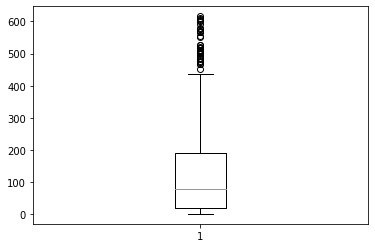

In [20]:
# plot the distribution
plt.boxplot(nrecords)

In [21]:
# we will keep only wells with 5 years of production
fiveYWells = nrecords[nrecords>=60].index
df5 = df[df["well_name"].isin(fiveYWells)].reset_index(drop=True)
df5.head(10)

,date,field,formation,well_name,oil,water,gas
0,1987-07-31,EULER,Athena,EUAT-1,2552.684578,0.0,4.943497e+05
1,1987-08-31,EULER,Athena,EUAT-1,2553.499502,0.0,4.944996e+05
2,1987-09-30,EULER,Athena,EUAT-1,2476.746157,0.0,4.795948e+05
3,1987-10-31,EULER,Athena,EUAT-1,2528.396267,0.0,9.961855e+05
4,1987-11-30,EULER,Athena,EUAT-1,2471.896561,0.0,9.739247e+05
5,1987-12-31,EULER,Athena,EUAT-1,2526.294515,0.0,9.953574e+05
6,1988-01-31,EULER,Athena,EUAT-1,2556.063052,0.0,1.007086e+06
7,1988-02-29,EULER,Athena,EUAT-1,2504.383394,0.0,9.867245e+05
8,1988-03-31,EULER,Athena,EUAT-1,2403.902873,0.0,9.471352e+05
9,1988-04-30,EULER,Athena,EUAT-1,2557.307810,0.0,1.007577e+06


In [22]:
# new data wells
df5["well_name"].unique().shape

(276,)

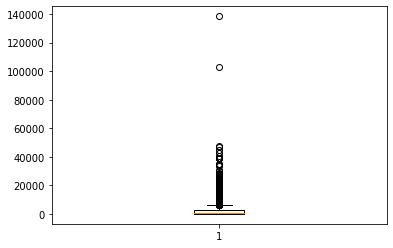

In [23]:
# studying oil rate
b = plt.boxplot(df5["oil"])

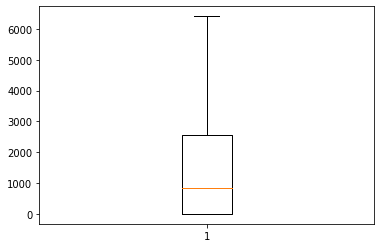

In [24]:
# studying oil rate
b = plt.boxplot(df5["oil"],showfliers=False)

In [25]:
# checking outliers
from scipy import stats
outliers = df5[np.abs(stats.zscore(df5["oil"])) > 3]
fliersWells = outliers["well_name"].unique()
fliersWells.shape

(40,)

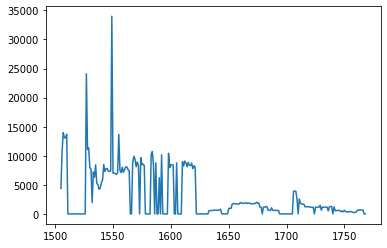

In [26]:
# checking one of the wells
w0 = fliersWells[0]
plt.plot(df5[df5["well_name"] == w0]["oil"])

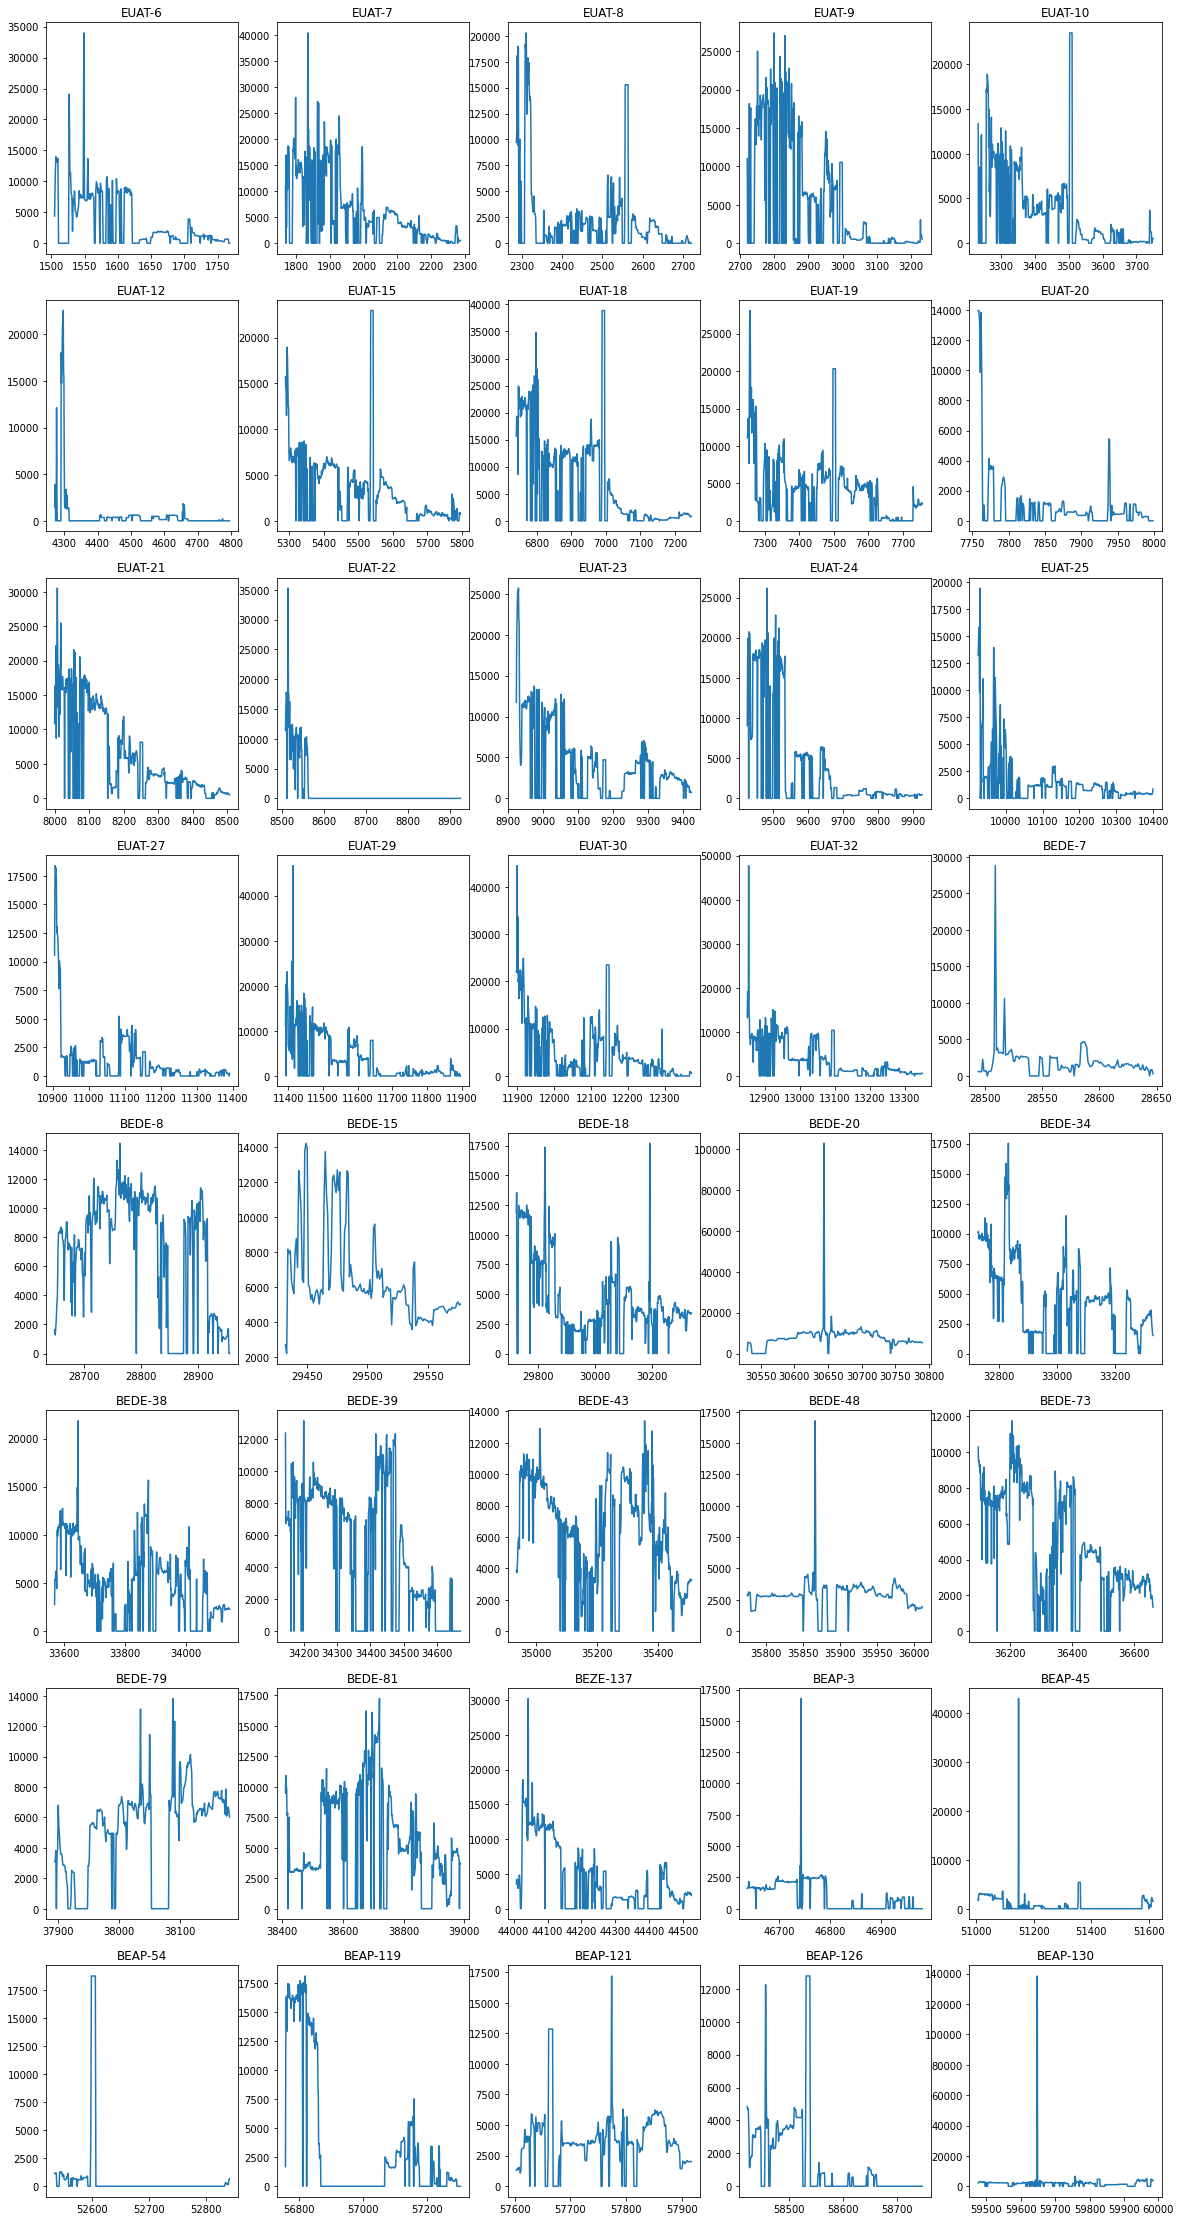

In [27]:
# lets plot them all
ncols = 5
nrows = fliersWells.shape[0]//ncols
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,nrows*5))
for i,w in enumerate(fliersWells):
    ax[i//ncols,i%ncols].plot(df5[df5["well_name"] == w]["oil"])
    ax[i//ncols,i%ncols].set_title(w)

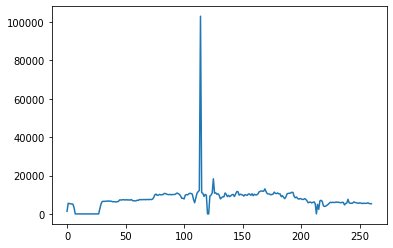

In [28]:
# getting one of wells that have sudden spike
bede20 = df5[df5["well_name"] == "BEDE-20"]
bede20Oil = np.array(bede20["oil"].tolist())
plt.plot(bede20Oil)

In [29]:
get_bands = lambda data : (np.mean(data) + 3.5*np.std(data),np.mean(data) - 3.5*np.std(data))
def get_anomaly(data,wp=20):
    """
    Receive numpy array and find the anomalous values
    """
    k = round(len(data) * (wp/2/100))
    N = len(data)
    bands = [get_bands(data[range(0 if i - k < 0 else i-k ,i + k if i + k < N else N)]) for i in range(0,N)]
    upper, lower = zip(*bands)
    anomalies = (data > upper) 
    xan,yan = np.where(anomalies)[0],data[anomalies]
    return xan,yan

def fix_anomaly(df,wells,anams,win=10):
    """
    Receive dataframe, well names, anomaly locations, and apply mean window on the anomalous locations
    """
    for w,a in zip(wells,anams):
        x = df[df["well_name"]==w]["oil"].to_numpy()
        for loc in a[0]:
            limit = min(0,loc-win),max(x.shape[0],loc+win)
            x[loc] = np.mean(a[limit[0]:limit[1]])
        df.loc[df.well_name==w,"oil"] = x
def plot_anomaly(df,wells,anams):
    """
    Receive dataframe, well names, anomaly locations to plot them
    """
    ncols = 5
    nrows = wells.shape[0]//ncols
    fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,nrows*5))
    for i, (w,a) in enumerate(zip(wells,anams)):
        # getting well data
        wdata = np.array(df[df["well_name"] == w]["oil"])
        xan,yan = a
        # getting anamoly
        ax[i//ncols,i%ncols].plot(wdata)
        for x,y in zip(xan,yan):
            ax[i//ncols,i%ncols].text(x-3,y,"X",c="red")
        # set plot title
        ax[i//ncols,i%ncols].set_title(w)

In [30]:
# get anamolies
anamolies = [get_anomaly(df5[df5["well_name"] == w]["oil"].to_numpy(),wp=50) for w in fliersWells]

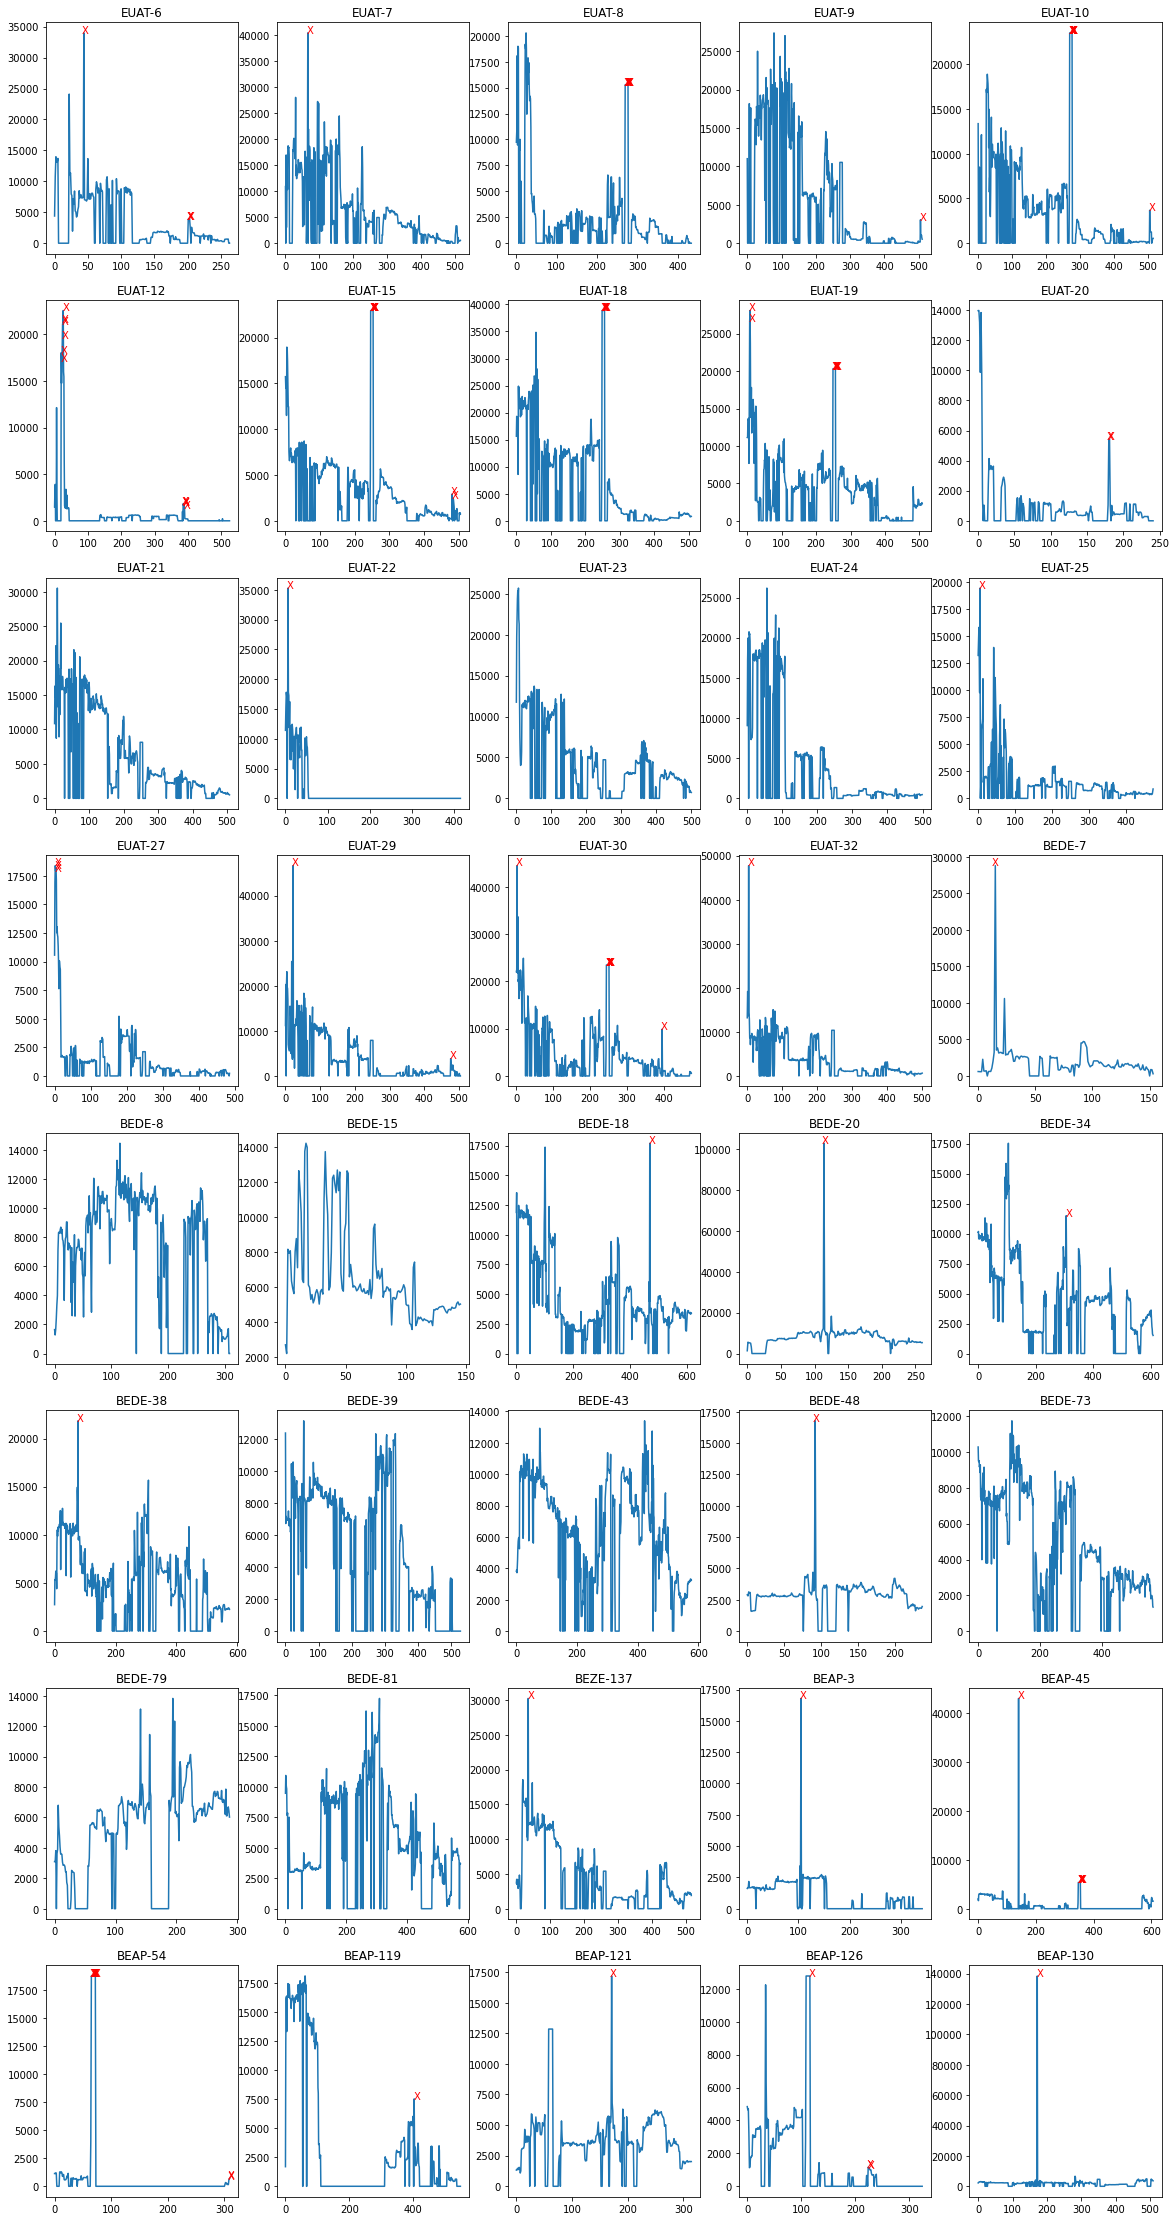

In [31]:
plot_anomaly(df5,fliersWells,anamolies)

In [32]:
# copying to not loose original
df5fixed = df5.copy()

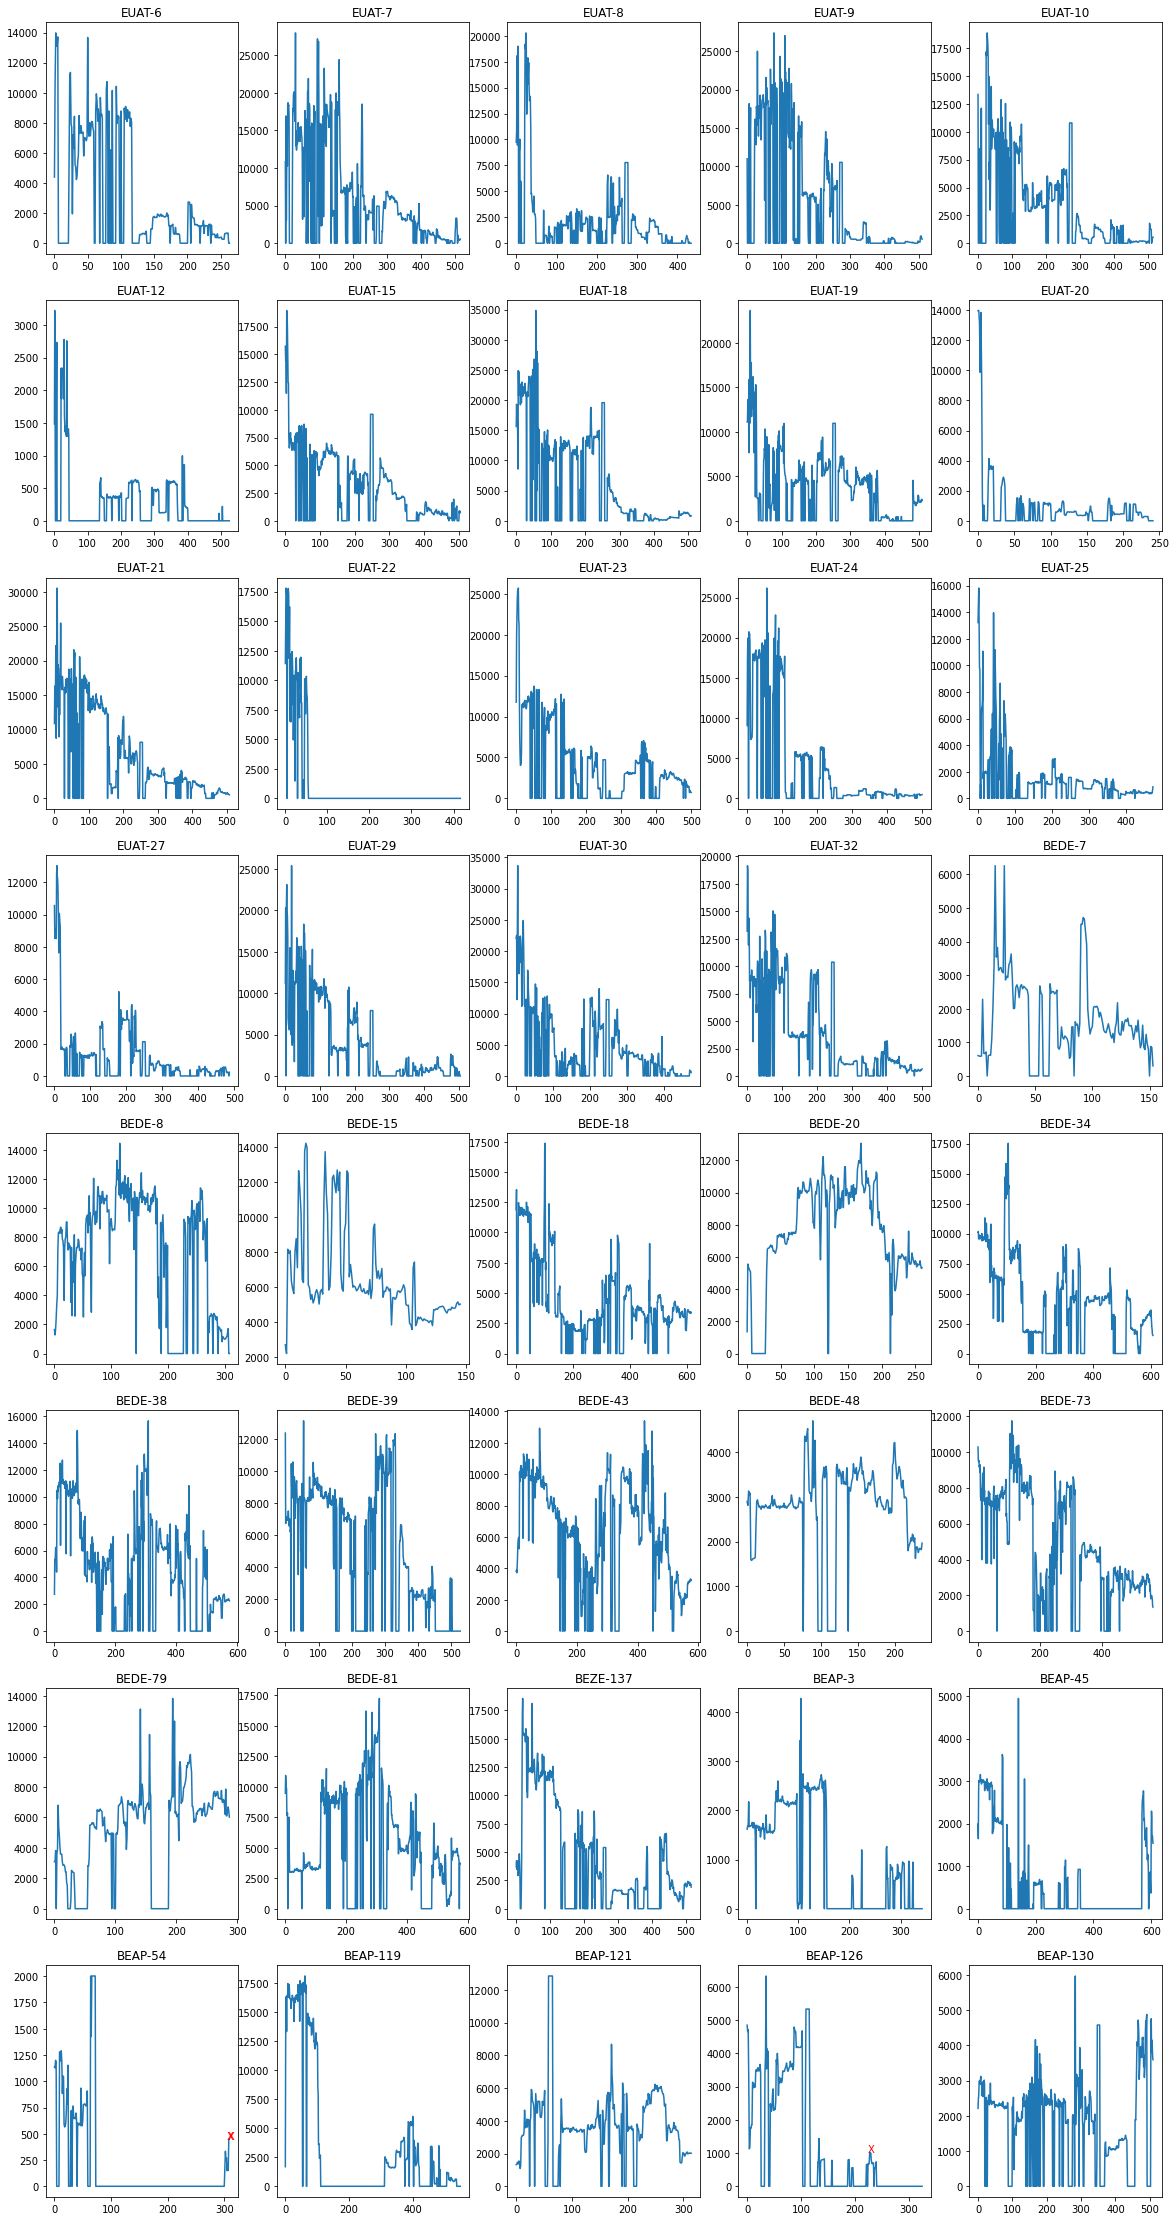

In [33]:
# run 7 times
for _ in range(7):
    anamolies = [get_anomaly(df5fixed[df5fixed["well_name"] == w]["oil"].to_numpy(),50) for w in fliersWells]
    fix_anomaly(df5fixed,fliersWells,anamolies)
anamolies = [get_anomaly(df5fixed[df5fixed["well_name"] == w]["oil"].to_numpy(),50) for w in fliersWells]
plot_anomaly(df5fixed,fliersWells,anamolies)

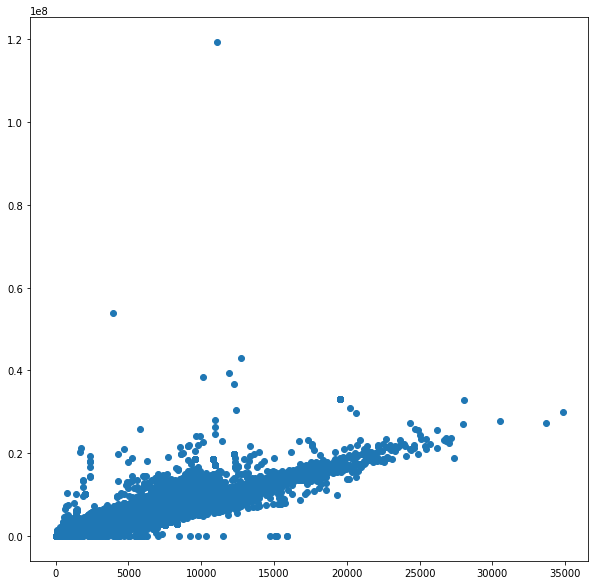

In [34]:
# plotting oil vs gas
plt.scatter(df5fixed["oil"],df5fixed["gas"])
plt.gcf().set_size_inches((10,10))

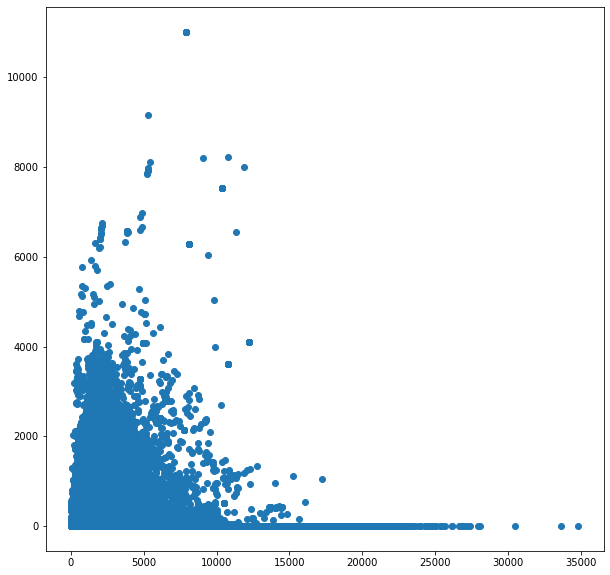

In [35]:
# plotting oil vs gas
plt.scatter(df5fixed["oil"],df5fixed["water"])
plt.gcf().set_size_inches((10,10))

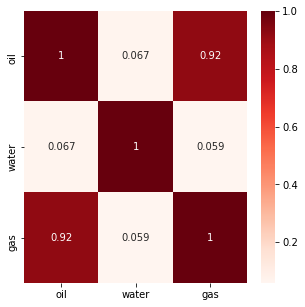

In [36]:
# show correlation matrix
import seaborn as sns
plt.figure(figsize=(5,5))
cor = df5fixed.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
# show field prodcution over time
fieldProduction = df5fixed.groupby(["field","date"])["oil"].sum().reset_index(drop=False)
fieldProduction

,field,date,oil
0,BERNOULLI,1961-07-31,14772.985805
1,BERNOULLI,1961-08-31,15394.307723
2,BERNOULLI,1961-09-30,4346.718954
3,BERNOULLI,1961-10-31,0.000000
4,BERNOULLI,1961-11-30,0.000000
...,...,...,...
1185,EULER,2012-06-30,49455.652452
1186,EULER,2012-07-31,48917.302348
1187,EULER,2012-08-31,47675.161499
1188,EULER,2012-09-30,49913.326833


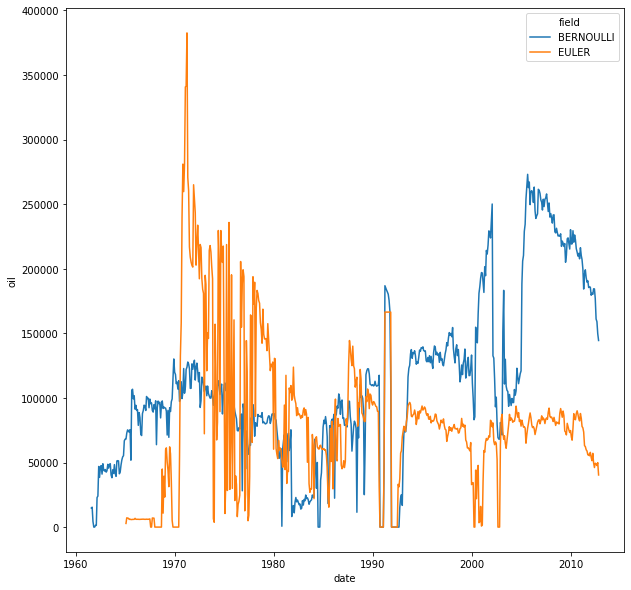

In [38]:
sns.lineplot(data=fieldProduction, x="date",y="oil",hue="field")
plt.gcf().set_size_inches((10,10))

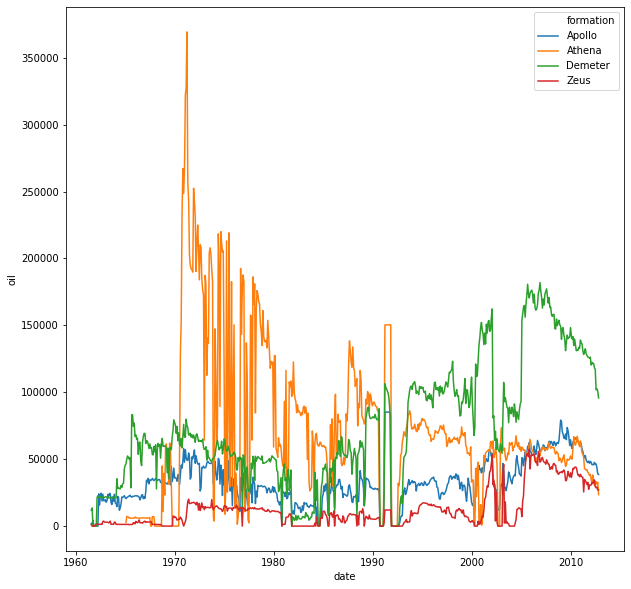

In [39]:
# show formation prodcution over time
formationProduction = df5fixed.groupby(["formation","date"])["oil"].sum().reset_index(drop=False)
sns.lineplot(data=formationProduction, x="date",y="oil",hue="formation")
plt.gcf().set_size_inches((10,10))

In [40]:
# the month of first day in the data
minMonth = df5fixed["date"].min().to_period('M')
# the month of last day in the data
maxMonth = df5fixed["date"].max().to_period('M')
# longest running period in months
maxPeriod = (maxMonth-minMonth).n
# adding new column to the dataframe that shows month since first day
df5fixed["month"] = (df5fixed["date"].dt.to_period("M")-minMonth).apply(lambda x: x.n)

In [43]:
"""show formation prodcution per well over time"""
# summing oil over well formation
wellFormationProduction = df5fixed.groupby(["well_name","formation","date","month"])["oil"].sum().reset_index(drop=False)
# getting athena formation
athena = wellFormationProduction[wellFormationProduction["formation"] == "Athena"]
# finding wells pass through athena
athenaWells = athena["well_name"].unique()
# creating numpy array to hold the data and fill it with zeros
# The data is (number of wells, longest running period in months)
data = np.zeros((len(athenaWells),maxPeriod))
# for each well in athena wells
for i,w in enumerate(athenaWells):
    # getting well data
    wdata = athena[athena["well_name"] == w]
    # convert well months to array
    index = wdata["month"].to_numpy()
    # making month number as index
    mn,mx = index[0]-1,index[-1]
    # adding well data to the right slice [min_month, max_month] 
    data[i,mn:mx] = wdata["oil"].to_numpy()

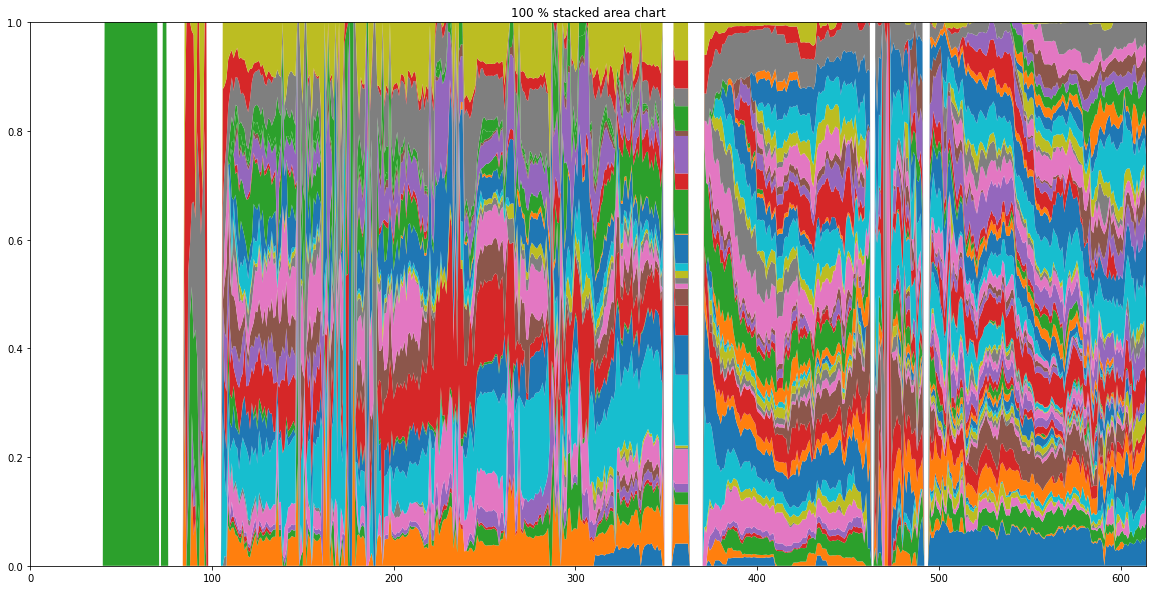

In [45]:
# ignoring divide by zero warning
np.seterr(divide='ignore', invalid='ignore')
# creating percentage data
pdata = data/data.sum(axis=0)
# filling nan with zeros in case of dividing by zero
np.nan_to_num(pdata,copy=False,nan=0)
# creating stackplot x = longest period, y = percentage data
plt.stackplot(np.arange(pdata.shape[-1]),*pdata,labels=athenaWells)
# setting figure size
plt.gcf().set_size_inches((20,10))
# removing margines
plt.margins(0,0)
# setting title
plt.title('100 % stacked area chart')
plt.show()